In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Purchasing requisition table
PR=pd.read_csv("clean_purchase_requisition.csv")
#Purchasing orders table 
PO=pd.read_csv("clean_purchase_orders.csv")
#Goods recieved table 
Goods=pd.read_csv("clean_Goods_receipt.csv")
#Invoices Table
Invoices=pd.read_csv("clean_invoices.csv")
#Payments table 
Payments=pd.read_csv("clean_payment_table.csv")

In [3]:
# I will check if any Purchasing requisition has the same person Prepared and reviewed the same requistion
same_staff_prepare_and_review_pr=PR[PR["Prepared By"]==PR["Reviewed By"]]
print(same_staff_prepare_and_review_pr)
print(f"number of times PR were prepared and reviewed by the same staff is {len(same_staff_prepare_and_review_pr)}")


     PR_Number  ITEM Number  QTY     PR Date  Store Prepared By Reviewed By
35   5814662.0    8003372.0    7  2018-01-01    6.0         LMM         LMM
101  5813951.0    8003922.0   11  2018-01-01    6.0         LMM         LMM
174  5813141.0    8003403.0    9  2018-01-01    6.0         LMM         LMM
219  5810459.0    8001298.0    8  2018-01-01    6.0         LMM         LMM
235  5812321.0    8001784.0   22  2018-01-01    6.0         LMM         LMM
326  5811402.0    8003026.0    3  2018-01-01    6.0         LMM         LMM
332  5811275.0    8001820.0   12  2018-01-01    6.0         LMM         LMM
358  5810743.0    8002831.0    3  2018-01-01    6.0         LMM         LMM
383  5811528.0    8001761.0    6  2018-01-02    6.0         LMM         LMM
407  5810239.0    8001088.0   14  2018-01-04    6.0         LMM         LMM
413  5812515.0    8000873.0    2  2018-01-04    6.0         LMM         LMM
414  5812411.0    8002191.0   19  2018-01-04    6.0         LMM         LMM
431  5813339

1- there is 20 times prurchasing requesition was prepared and reviewed by the same person , it all happen in store 6 by LMM

-------------------------------------------------------------------------------------------------------

there are 129 Purchasing requisition issued without revision


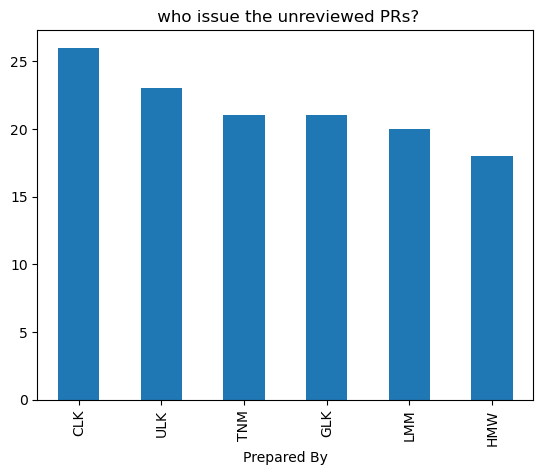

In [4]:
# I will get a dataframe of not reviewd PR and I will invistigate those PRs
not_reviewed_PR=PR[PR["Reviewed By"]=="0"]
print(f"there are {len(not_reviewed_PR)} Purchasing requisition issued without revision")
# finding the distribution of not reviewed ordered 
not_reviewed_PR["Prepared By"].value_counts().plot(kind="bar")
plt.title (" who issue the unreviewed PRs?")
plt.show()

2-There are 129 purchasing requisition issued without revision , 26  by CLK 

--------------------------------------------------------------------------------------------------------

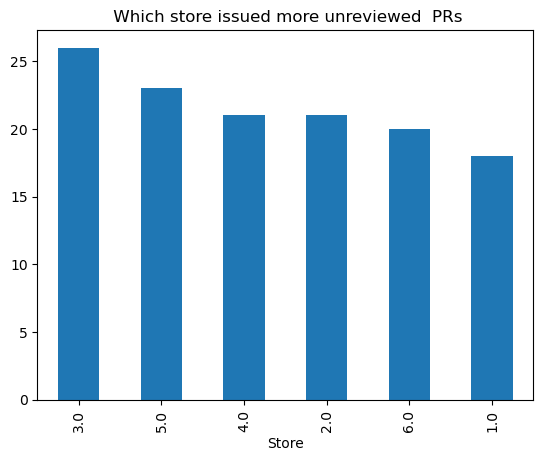

In [5]:
# I will check unreviewed Purshasing Requesitions locations 
not_reviewed_PR["Store"].value_counts().plot(kind="bar")
plt.title (" Which store issued more unreviewed  PRs")
plt.show()

3-  26  unreviewed purchsing requisition issued in store 3

------------------------------------------------------------------------------------------------------

there is 110 purchasing orders prepared and reviewed by the same staff


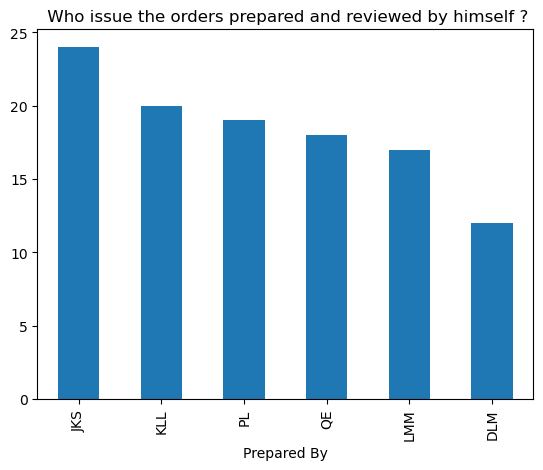

In [6]:
# I will check if any Purchasing orders has the same person Prepared and reviewed the same order
same_staff_prepare_and_review_orders=PO[PO["Prepared By"]==PO["Reviewed By"]]
print(f"there is {len(same_staff_prepare_and_review_orders)} purchasing orders prepared and reviewed by the same staff")
same_staff_prepare_and_review_orders["Prepared By"].value_counts().plot(kind="bar")
plt.title (" Who issue the orders prepared and reviewed by himself ?")
plt.show()

4-There is 110 purchasing orders prepared and reviewed by the same staff 

-----------------------------------------------------------------------------------------------------

In [7]:
# I will check the cases where there is no Purchasing Requesition and the order is Prepared and Reviewed by the same person
same_staff_prepare_and_review_orders[same_staff_prepare_and_review_orders["PR_Number"]==0]

,PO_Number,ITEM Number,QTY,Unit Cost,PO_Amount,PO_Date,SUPCO,SUPPLIER_NAME,PR_Number,Prepared By,Reviewed By
2,FF0839100,8001136.0,15,219.114000,3286.71,2018-01-01,G1201,GRAFTERS,0.0,KLL,KLL
491,HH1639107,8001468.0,11,520.395455,5724.35,2018-01-20,H1011,ROSS HILLMAN LTD,0.0,KLL,KLL


6- There is 2 purchasing orders without PR and was perepared and reviewed by the same staff (KLL)

-----------------------------------------------------------------------------------------------------

there is 13 PO was issued without PR


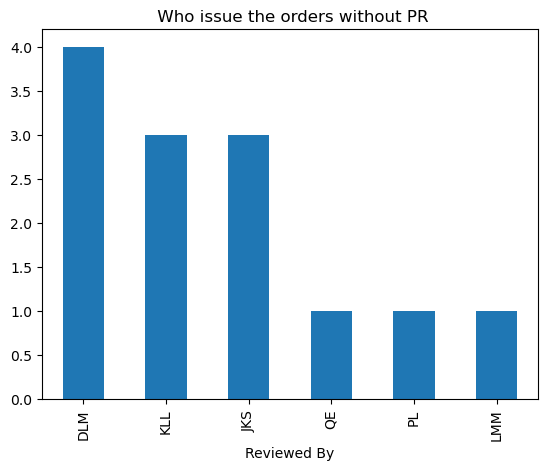

In [8]:
# i will invistigate purchasing orders without purshasing requisition 
PO_without_PR=PO[PO["PR_Number"]==0]
print(f"there is {len(PO_without_PR)} PO was issued without PR")
PO_without_PR=PO_without_PR[["Prepared By","Reviewed By"]]
PO_without_PR["Reviewed By"].value_counts().plot(kind="bar")
plt.title (" Who issue the orders without PR")
plt.show()


7-There is 13 PO was issued without PR 

-------------------------------------------------------------------------------------------------------

In [9]:
# comparing Item number in both PR and PO
PR_Table_QTY=PR[["PR_Number","ITEM Number"]]
PO_Table_QTy=PO[["PR_Number","ITEM Number"]]
comparing_Items=pd.merge(PR_Table_QTY,PO_Table_QTy,on="PR_Number")
not_matched_items=len(comparing_Items[comparing_Items["ITEM Number_x"]!=comparing_Items["ITEM Number_y"]])
print(f"there is {not_matched_items} items different in PR and PO")


there is 0 items different in PR and PO


In [10]:
# I  will invistigate that the items quantaties are the same in PR and PO tables
PR_Table_QTY=PR[["PR_Number","QTY"]]
PO_Table_QTy=PO[["PR_Number","QTY"]]
comparing_QTY=pd.merge(PR_Table_QTY,PO_Table_QTy,on="PR_Number")
not_matched_items_qty=len(comparing_QTY[comparing_QTY["QTY_x"]!=comparing_QTY["QTY_y"]])
print(f"there is {not_matched_items_qty} items_QTY different in PR and PO")

there is 0 items_QTY different in PR and PO


7-PR items_number  and items_quantaties are the same in both  PR and PO 

-------------------------------------------------------------------------------------------------------

Now I will investigate Goods recieved and Invoices recieved and payment made 


In [11]:
# invistigating duplication in purchasing orders
print (f"number of purchasing orders in purchasing order table before cheking duplicate POs is {PO.shape[0]}") 
duplicated_PO=PO["PO_Number"].duplicated()
duplicated_PO=PO[duplicated_PO]["PO_Number"]
print(f"Number of found duplicated PR_orders is  {len(duplicated_PO)} Purchasing Orders")
print(f"Duplicated_Purshasing Orders found is {duplicated_PO.values}")


number of purchasing orders in purchasing order table before cheking duplicate POs is 654
Number of found duplicated PR_orders is  1 Purchasing Orders
Duplicated_Purshasing Orders found is ['GG1239107']


In [12]:
#invistigating duplicates PO in Goods_recieved Table 
print (f"number of purchasing orders in Goods table before cheking duplicate POs is {Goods.shape[0]}")
duplicated_PO=Goods["PO_Number"].duplicated()
duplicated_PO=Goods[duplicated_PO]["PO_Number"]
print(f"Number of found duplicated PO_orders is  {len(duplicated_PO)} Purchasing Orders")
print(f"Duplicated_Purshasing Orders found is {duplicated_PO.values}")

number of purchasing orders in Goods table before cheking duplicate POs is 469
Number of found duplicated PO_orders is  1 Purchasing Orders
Duplicated_Purshasing Orders found is ['GG1239107']


In [13]:
# I will join purshasing orders table to Goods_recieved table 
orders_and_goods_recieved=pd.merge(PO,Goods,on="PO_Number",how="inner")
print(f" the columns in the new join table are \n {list(orders_and_goods_recieved.columns)} \n and the shape of table is {orders_and_goods_recieved.shape}")

 the columns in the new join table are 
 ['PO_Number', 'ITEM Number_x', 'QTY', 'Unit Cost', 'PO_Amount', 'PO_Date', 'SUPCO', 'SUPPLIER_NAME', 'PR_Number', 'Prepared By', 'Reviewed By', 'ITEM Number_y', 'QTY Received', 'Received by', 'Receipt Date', 'Claimed', 'Claimed Date'] 
 and the shape of table is (468, 17)


In [14]:
# I will invistigate that the same items in PO is the same items recieved in goods table 
mask=orders_and_goods_recieved['ITEM Number_x']!=orders_and_goods_recieved['ITEM Number_y']
not_matched_items_in_orders_and_goods_table=orders_and_goods_recieved[mask]
not_matched_items_in_orders_and_goods_table


,PO_Number,ITEM Number_x,QTY,Unit Cost,PO_Amount,PO_Date,SUPCO,SUPPLIER_NAME,PR_Number,Prepared By,Reviewed By,ITEM Number_y,QTY Received,Received by,Receipt Date,Claimed,Claimed Date
163,GG1239107,8003489.0,17,1973.388824,33547.61,2018-01-01,A0206,ACORN PACKAGING,5811958.0,LMM,JKS,8003104,11,GLK,2018-01-24,N,0
164,GG1239107,8003104.0,11,3049.782727,33547.61,2018-01-09,A0206,ACORN PACKAGING,5810470.0,DLM,DLM,8003489,17,GLK,2018-01-04,N,0


1- concolution that there is 469 recieved items all  have a PO request  in PO table , and there is one duplicated PO request both in PO table and in Goods recieved table 
- The duplicated  PO is GG1239107 , the duplication happen to fix a previous error , at first a  PO request made of 17 items of 8003489 but they recieved 11 items of 8003104 , so  they fix the problem by made another reverse PO and they recieved the reversed items 

In [15]:
# I will invistigate PO GG1239107 in invoices table  and in payments table 
Invoices[Invoices["PO_Number"]=="GG1239107"]

,SUPCO,SUPPLIER_NAME,INVNO,INVDT_DATE,PO_Number,GROSS,NET,VAT
418,A0206,ACORN PACKAGING,740687,2018-01-25,GG1239107,33547.61,28551.16,4996.45
419,A0206,ACORN PACKAGING,740687.,2018-01-25,GG1239107,33547.61,28551.16,4996.45


There is two different invoices (740687 and 740687.) for the same PO. "the second invoice with a dot"

In [16]:
Payments

,SUPCO,SUPPLIER_NAME,INVNO,INVDT_DATE,PAYMENT DATE,PAID AMOUNT,Bank Details
0,A0206,ACORN PACKAGING,741044,2018-01-02,2018-01-15,8968.52,01-88-70/42866418
1,A0521,R F AMIES(KIDDERMINSTER)LTD,220563,2018-01-02,2018-01-19,25.92,03-09-28/77484668
2,B4406,BRIGGS EQUIPMENT UK LTD,SINV7299446,2018-01-02,2018-01-12,809.88,08-67-30/73313715
3,G1095,GEM SUPPLIES LTD,9124,2018-01-30,2018-01-31,3985.02,26-13-32/25677314
4,B9565,BUTLER REYNOLDS LTD,173486,2018-01-02,2018-01-16,1041.44,13-04-68/16881364
...,...,...,...,...,...,...,...
275,M1159,MATCH BOARD INTERNATIONAL LTD,52708,2018-01-17,2018-01-23,5137.06,47-98-38/51311575
276,R1651,ROUDEN PIPETEK,41015,2018-01-17,2018-01-23,8288.28,72-79-68/98515289
277,R1438,RED FUNNEL,64577591,2018-01-17,2018-01-31,623.28,72-07-66/76363732
278,P1802,PRAMAC (UK) LTD,289,2018-01-17,2018-01-23,12752.16,60-73-63/79275624


In [17]:
# I will invistigate PO GG1239107 in invoices table  and in payments table 
Payments[Payments["INVNO"]=="740687"]

,SUPCO,SUPPLIER_NAME,INVNO,INVDT_DATE,PAYMENT DATE,PAID AMOUNT,Bank Details


There is no payment done for the duplicated invoice_no 740687 yet 

------------------------------------------------------------------------------------------------------

In [18]:
# I will invistigate that the order items_number  is the same in PO and in Goods recieved 
mask=orders_and_goods_recieved["ITEM Number_x"]!=orders_and_goods_recieved["ITEM Number_y"]
orders_and_goods_recieved[mask]


,PO_Number,ITEM Number_x,QTY,Unit Cost,PO_Amount,PO_Date,SUPCO,SUPPLIER_NAME,PR_Number,Prepared By,Reviewed By,ITEM Number_y,QTY Received,Received by,Receipt Date,Claimed,Claimed Date
163,GG1239107,8003489.0,17,1973.388824,33547.61,2018-01-01,A0206,ACORN PACKAGING,5811958.0,LMM,JKS,8003104,11,GLK,2018-01-24,N,0
164,GG1239107,8003104.0,11,3049.782727,33547.61,2018-01-09,A0206,ACORN PACKAGING,5810470.0,DLM,DLM,8003489,17,GLK,2018-01-04,N,0


2-All orders items_number are the same in purchsing order table and in goods recieved table , which means that the items which have been recieved is the same items which have been ordered which has the same PO , - except for the  duplicated order GG1239107

In [19]:
# I will investigate that the items quantaties is the same in purchasing order and in good recieved
mask=orders_and_goods_recieved['QTY']!=orders_and_goods_recieved['QTY Received']
not_matching_orders_quantaties=orders_and_goods_recieved[mask]
not_matching_orders_quantaties_in_POtable_and_Goodsrecieved=not_matching_orders_quantaties[["PO_Number","Unit Cost","QTY","PO_Amount","QTY Received"]]
not_matching_orders_quantaties_in_POtable_and_Goodsrecieved
print(f" there are {len(not_matching_orders_quantaties_in_POtable_and_Goodsrecieved)} not matching order items quantaties in PO table and Good recieved table")


 there are 76 not matching order items quantaties in PO table and Good recieved table


3-Concolusion that PO quantaties and  goods_recieved quantaties are not matching for 76 purchasing orders!

------------------------------------------------------------------------------------------------------

In [20]:
# I will investigate Goods receipt date , compared to Purchasing order date 
mask=orders_and_goods_recieved['PO_Date']> orders_and_goods_recieved['Receipt Date']
Goods_recieved_before_PO=orders_and_goods_recieved[mask]
print (f"There are {len(Goods_recieved_before_PO)} goods reciept date before Purchasing order date")

There are 35 goods reciept date before Purchasing order date


There are 35 goods reciept date before Purchasing order date , I will investigate deeply

In [21]:
Goods_recieved_before_PO.columns

Index(['PO_Number', 'ITEM Number_x', 'QTY', 'Unit Cost', 'PO_Amount',
       'PO_Date', 'SUPCO', 'SUPPLIER_NAME', 'PR_Number', 'Prepared By',
       'Reviewed By', 'ITEM Number_y', 'QTY Received', 'Received by',
       'Receipt Date', 'Claimed', 'Claimed Date'],
      dtype='object')

In [22]:
Goods_recieved_before_PO['SUPPLIER_NAME'].value_counts()

SUPPLIER_NAME
BRIGGS EQUIPMENT UK LTD                7
SALEPOINT LTD                          3
MACE INDUSTRIES LTD                    2
SAFESTAND LTD                          2
BLUE DIAMOND TECHNOLOGIES LTD          2
DOUGLAS SCOTT                          2
CHEMAIDE LTD                           1
SIMMONS OF STAFFORD                    1
PROGRESSIVE PRODUCTS LTD               1
TAYLOR MAXWELL & CO LTD                1
RED FUNNEL                             1
MEDLAND SANDERS AND TWOSE LIMITED      1
ACORN PACKAGING                        1
J A JACKSON CONTRACTORS(PRESTON)LTD    1
G REEKIE GROUP LTD                     1
SVR PLASTICS LTD                       1
W ROBINSON & SONS (EC) LTD             1
ALAN R JONES & SONS LTD                1
T W JONES                              1
ALLBUILD PRODUCTS                      1
PHS GROUP LTD                          1
FULWOOD SUPPLIES LTD                   1
FILPLASTICS(UK)LTD                     1
Name: count, dtype: int64

Goods reciept date was before PO date 7 times in jan 2018 for the provider (BRIGGS EQUIPMENT UK LTD)

In [23]:
Goods_recieved_before_PO['Reviewed By'].value_counts()

Reviewed By
LMM    12
DLM    10
JKS     4
QE      3
KLL     3
PL      3
Name: count, dtype: int64

Most of those PO reviewed by LMM 12 order , and DLM 10 orders

---------------------------------------------------------------------------------------------------

Now I will create a new table of PO and good_recieved of those PO and invoices recieved for those goods
- So in this table I will have invoices for only goods recieved based on jan 2018 PO

In [24]:
# I will join invoices  to order_and_goods table 
orders_goods_and_invoice_recieved=pd.merge(orders_and_goods_recieved,Invoices, on="PO_Number",how="inner")
print(f" the columns in the new join table are \n {list(orders_goods_and_invoice_recieved)} \n and the shape of table is {orders_goods_and_invoice_recieved.shape}")

 the columns in the new join table are 
 ['PO_Number', 'ITEM Number_x', 'QTY', 'Unit Cost', 'PO_Amount', 'PO_Date', 'SUPCO_x', 'SUPPLIER_NAME_x', 'PR_Number', 'Prepared By', 'Reviewed By', 'ITEM Number_y', 'QTY Received', 'Received by', 'Receipt Date', 'Claimed', 'Claimed Date', 'SUPCO_y', 'SUPPLIER_NAME_y', 'INVNO', 'INVDT_DATE', 'GROSS', 'NET', 'VAT'] 
 and the shape of table is (389, 24)


5-concolusion is : from 468 goods recieved there is only 389 recieved invoices , 
- there is two different invoices for the duplicated PO GG1239107
- there are 79 goods_recieved but without invoice_recieved yet

---------------------------------------------------------------------------------------------------


I will invistigate the date of the invoice compared to the date of PO

In [25]:
mask=orders_goods_and_invoice_recieved['PO_Date']>orders_goods_and_invoice_recieved['INVDT_DATE']
invoices_made_before_PO=orders_goods_and_invoice_recieved[mask]
print (f"There are {len(invoices_made_before_PO)} invoices date before Purchasing order date")

There are 16 invoices date before Purchasing order date


There are 16 invoices date before Purchasing order date

Now I will add a payment column to the previous table , So I will have goods_recieved with Invoices and Payment done 

In [26]:
# I will mereg the payment table , so i will have a table of all payment done to jan orders with  good recieved and invoices
Payment_for_goods_recieved=pd.merge(orders_goods_and_invoice_recieved,Payments, on="INVNO",how="inner")
print(f" the columns in the new join table are \n {list(Payment_for_goods_recieved.columns)} \n and the shape of table is {Payment_for_goods_recieved.shape}")

 the columns in the new join table are 
 ['PO_Number', 'ITEM Number_x', 'QTY', 'Unit Cost', 'PO_Amount', 'PO_Date', 'SUPCO_x', 'SUPPLIER_NAME_x', 'PR_Number', 'Prepared By', 'Reviewed By', 'ITEM Number_y', 'QTY Received', 'Received by', 'Receipt Date', 'Claimed', 'Claimed Date', 'SUPCO_y', 'SUPPLIER_NAME_y', 'INVNO', 'INVDT_DATE_x', 'GROSS', 'NET', 'VAT', 'SUPCO', 'SUPPLIER_NAME', 'INVDT_DATE_y', 'PAYMENT DATE', 'PAID AMOUNT', 'Bank Details'] 
 and the shape of table is (221, 30)


In [27]:
# I will check what is the payment date for the invoices that has a invoice date before PO date
violated_invoices_date_payment=pd.merge(invoices_made_before_PO,Payment_for_goods_recieved,on='PO_Number',how="inner" )
violated_invoices_date_payment=violated_invoices_date_payment[['Reviewed By_x','Received by_y','PO_Number',"PO_Date_x","Receipt Date_x","INVDT_DATE","PAYMENT DATE",]]
violated_invoices_date_payment

,Reviewed By_x,Received by_y,PO_Number,PO_Date_x,Receipt Date_x,INVDT_DATE,PAYMENT DATE
0,DLM,TNM,EE0439086,2018-01-03,2018-01-20,2018-01-02,2018-01-05
1,DLM,CLK,GG1439086,2018-01-03,2018-01-29,2018-01-02,2018-01-07
2,KLL,GLK,BB0939086,2018-01-05,2018-01-17,2018-01-04,2018-01-07
3,DLM,GLK,EE0939086,2018-01-05,2018-01-14,2018-01-03,2018-01-14
4,QE,TNM,EE0139086,2018-01-05,2018-01-09,2018-01-03,2018-01-13
5,LMM,ULK,GG0139086,2018-01-05,2018-01-12,2018-01-04,2018-01-08
6,JKS,CLK,FF0839086,2018-01-05,2018-01-06,2018-01-03,2018-01-09
7,DLM,TNM,HH0439086,2018-01-06,2018-01-24,2018-01-04,2018-01-25
8,QE,GLK,CC0939093,2018-01-13,2018-01-15,2018-01-11,2018-01-27
9,JKS,GLK,AA1139107,2018-01-25,2018-01-24,2018-01-23,2018-01-31


In [28]:
mask=violated_invoices_date_payment["PAYMENT DATE"]<violated_invoices_date_payment["Receipt Date_x"]
violated_invoices_date_payment[mask]	

,Reviewed By_x,Received by_y,PO_Number,PO_Date_x,Receipt Date_x,INVDT_DATE,PAYMENT DATE
0,DLM,TNM,EE0439086,2018-01-03,2018-01-20,2018-01-02,2018-01-05
1,DLM,CLK,GG1439086,2018-01-03,2018-01-29,2018-01-02,2018-01-07
2,KLL,GLK,BB0939086,2018-01-05,2018-01-17,2018-01-04,2018-01-07
5,LMM,ULK,GG0139086,2018-01-05,2018-01-12,2018-01-04,2018-01-08


6 -concolusion 
- from 389 invoices recieved 221 payment was done in jan 2018 for goods recieved and invoices recieved .
- 4 payments were made for invoices which has a payment date before PO date 

--------------------------------------------------------------------------------------------------------

I will see if there is any invoices issued without recieving the goods !

In [29]:
# I will filter the invoices only has a PO in Jan 2018
mask=Invoices["PO_Number"].isin (PO["PO_Number"])
invoices_for_JAN_PO=Invoices[mask]
print(f"I have {len(invoices_for_JAN_PO)} invoices that has a PO issued in JAN")

I have 464 invoices that has a PO issued in JAN


In [30]:
# I will find the invoices with issued in JAN without Goods_recieved in JAN
mask = ~invoices_for_JAN_PO["PO_Number"].isin(Goods["PO_Number"])
invoices_for_not_recieved_goods=invoices_for_JAN_PO[mask]
print (f"there is {len(invoices_for_not_recieved_goods)} invoices issued for items not recieved yet ")



there is 81 invoices issued for items not recieved yet 


Threre are 81 invoices issued for items not recieved yet 

I will invistigate the Incident deeply

In [31]:
# confirming that those invoices has a PO in jan , and invistigating POs for those invoices
violation_invoices=pd.merge(invoices_for_not_recieved_goods,PO,on="PO_Number",how="inner")[['Prepared By','Reviewed By','PO_Date','INVDT_DATE',]]
violation_invoices.head(3)

,Prepared By,Reviewed By,PO_Date,INVDT_DATE
0,PL,DLM,2018-01-05,2018-01-04
1,PL,DLM,2018-01-07,2018-01-09
2,JKS,KLL,2018-01-11,2018-01-10


In [32]:
# Investigating if the date of the invoice is before the date of PO
mask=violation_invoices['PO_Date']>violation_invoices['INVDT_DATE']
violation_invoice_unlogic_date=violation_invoices[mask]
violation_invoice_unlogic_date

,Prepared By,Reviewed By,PO_Date,INVDT_DATE
0,PL,DLM,2018-01-05,2018-01-04
2,JKS,KLL,2018-01-11,2018-01-10
7,PL,LMM,2018-01-18,2018-01-16
8,JKS,LMM,2018-01-18,2018-01-16
13,LMM,DLM,2018-01-18,2018-01-17
20,JKS,JKS,2018-01-19,2018-01-18
42,KLL,QE,2018-01-25,2018-01-24
44,PL,PL,2018-01-27,2018-01-25
47,QE,LMM,2018-01-27,2018-01-25
54,DLM,PL,2018-01-27,2018-01-25


There are 81 invoices issued for purchasing orders in jan  without goods recieved )
- 10 of those violations invoice date before PO data !

In [33]:
# investigate if payment done for invoices without good recieved 
mask=Payments["INVNO"].isin(invoices_for_not_recieved_goods["INVNO"])
payment_without_recieving_goods=Payments[mask]
len(payment_without_recieving_goods)

26

There are 26 payment done for invoices issued without any goods recieved 

------------------------------------------------------------------------------------------------------

In [34]:
# I will invistigate if the order amount in PO table is the same in Invoices Table
mask=orders_goods_and_invoice_recieved["PO_Amount"]!=orders_goods_and_invoice_recieved["GROSS"]
orders_goods_and_invoice_recieved[mask]

,PO_Number,ITEM Number_x,QTY,Unit Cost,PO_Amount,PO_Date,SUPCO_x,SUPPLIER_NAME_x,PR_Number,Prepared By,...,Receipt Date,Claimed,Claimed Date,SUPCO_y,SUPPLIER_NAME_y,INVNO,INVDT_DATE,GROSS,NET,VAT


Order amount in PO table is the same as Gross amount in Invoices Table , for all issued invoices

In [35]:
# I will investigate if Payment made is the same as invoice net 
mask=Payment_for_goods_recieved["PAID AMOUNT"]!=Payment_for_goods_recieved["NET"]
unmatched_invoices_payments=Payment_for_goods_recieved[mask]
unmatched_invoices_payments.head(5)

,PO_Number,ITEM Number_x,QTY,Unit Cost,PO_Amount,PO_Date,SUPCO_x,SUPPLIER_NAME_x,PR_Number,Prepared By,...,INVDT_DATE_x,GROSS,NET,VAT,SUPCO,SUPPLIER_NAME,INVDT_DATE_y,PAYMENT DATE,PAID AMOUNT,Bank Details
81,FF0139093,8003540.0,3,137.460000,412.38,2018-01-01,T0337,TOUPRET (UK),5812801.0,JKS,...,2018-01-11,412.38,350.96,61.42,T0337,TOUPRET (UK),2018-01-11,2018-01-24,333.4120,84-82-58/42562862
83,BB0739086,8003241.0,16,204.349375,3269.59,2018-01-01,Y0071,A C YULE GROUP,5812737.0,PL,...,2018-01-03,3269.59,2782.63,486.96,Y0071,A C YULE GROUP,2018-01-03,2018-01-21,2643.4985,91-34-96/31552669
84,DD0539086,8003474.0,19,1038.047368,19722.90,2018-01-01,P9627,PACKEXE LTD,5812659.0,QE,...,2018-01-03,19722.90,16785.45,2937.45,P9627,PACKEXE LTD,2018-01-03,2018-01-28,13428.3600,33-69-90/78912345
86,HH1139086,8003855.0,10,4359.459000,43594.59,2018-01-01,S0825,SALEPOINT LTD,5812546.0,JKS,...,2018-01-04,43594.59,37101.78,6492.81,S0825,SALEPOINT LTD,2018-01-04,2018-01-20,55652.6700,77-28-70/44775563
104,FF1439093,8002755.0,5,4165.188000,20825.94,2018-01-01,B4406,BRIGGS EQUIPMENT UK LTD,5810450.0,DLM,...,2018-01-09,20825.94,17724.20,3101.74,B4406,BRIGGS EQUIPMENT UK LTD,2018-01-09,2018-01-12,16837.9900,08-67-30/73313715


Concolusion is there 11 orders there is no match between invoice net amount and payment made